In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading in the data from FRED and storing it in a dataframe
Household_Income_Path = "Resources/Real Median Household Income.csv"
Real_Median_Household_Income = pd.DataFrame(pd.read_csv(Household_Income_Path))
Price_of_a_Home_Path = "Resources/Utah State House Price Index.csv"
Average_Price_of_a_Home = pd.DataFrame(pd.read_csv(Price_of_a_Home_Path))
Population_Path = "Resources/Resident Population in Utah.csv"
Population = pd.DataFrame(pd.read_csv(Population_Path))
display(Real_Median_Household_Income.head())
display(Average_Price_of_a_Home.head())
display(Population.head())

,DATE,MEHOINUSUTA672N
0,1984-01-01,58410
1,1985-01-01,61830
2,1986-01-01,63350
3,1987-01-01,61850
4,1988-01-01,59160


,DATE,UTSTHPI
0,1975-01-01,55.14
1,1975-04-01,58.70
2,1975-07-01,55.16
3,1975-10-01,59.90
4,1976-01-01,61.79


,DATE,UTPOP
0,1900-01-01,277.0
1,1901-01-01,284.0
2,1902-01-01,292.0
3,1903-01-01,299.0
4,1904-01-01,308.0


In [3]:
# Manipulating the Data:

# Change values in DATE column to datetime:
Real_Median_Household_Income['DATE'] = pd.to_datetime(Real_Median_Household_Income['DATE'])
Average_Price_of_a_Home['DATE'] = pd.to_datetime(Average_Price_of_a_Home['DATE'])
Population['DATE'] = pd.to_datetime(Population['DATE'])

# Merge the dataframes on the DATE column:
merged_df_2_of_3 = pd.merge(Population, Average_Price_of_a_Home, on="DATE", how="outer")
merged_df = pd.merge(merged_df_2_of_3, Real_Median_Household_Income, on="DATE", how="outer")

#Reanme the columns:
merged_df = merged_df.rename(columns={"DATE":"ds", "UTPOP":"Population in Thousands", "UTSTHPI":"House Price Index in Percentage of 1980 Median Home Price", "MEHOINUSUTA672N":"Median Household Income Per Year in Thousands of Dollars"})

# Drop the rows with NaN values:
condensed_df = merged_df.dropna()
# Reset the index:
condensed_df_df = condensed_df.reset_index(drop=True)

# Display the dataframe:
display(condensed_df.head())

filled_df = merged_df.interpolate(method='linear', limit_direction='both')

# Drop all values before January 1, 2000:
filled_df = filled_df[~(filled_df['ds'] < '2000-01-01')]
filled_df = filled_df.reset_index(drop=True)

,ds,Population in Thousands,House Price Index in Percentage of 1980 Median Home Price,Median Household Income Per Year in Thousands of Dollars
84,1984-01-01,1622.342,112.29,58410.0
85,1985-01-01,1642.910,116.67,61830.0
86,1986-01-01,1662.834,119.22,63350.0
87,1987-01-01,1678.119,119.34,61850.0
88,1988-01-01,1689.372,112.85,59160.0


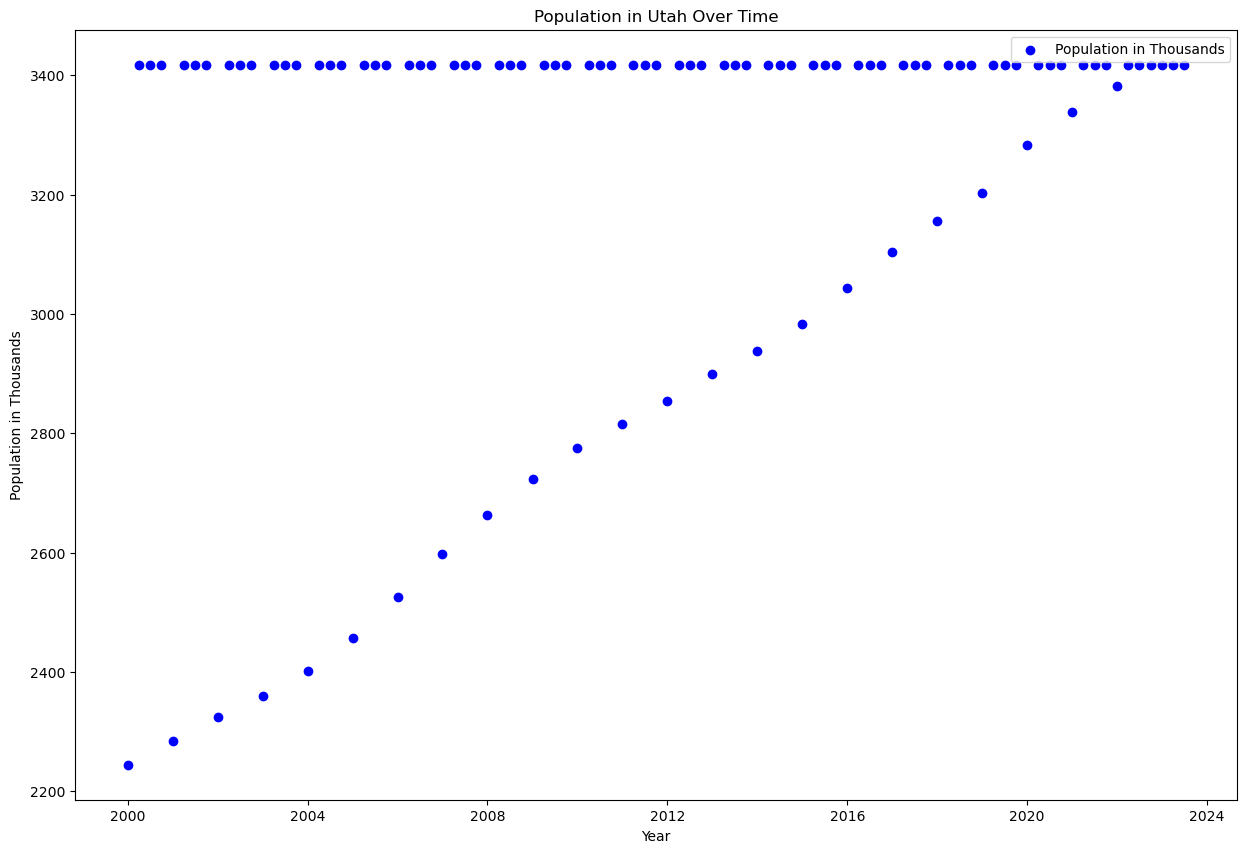

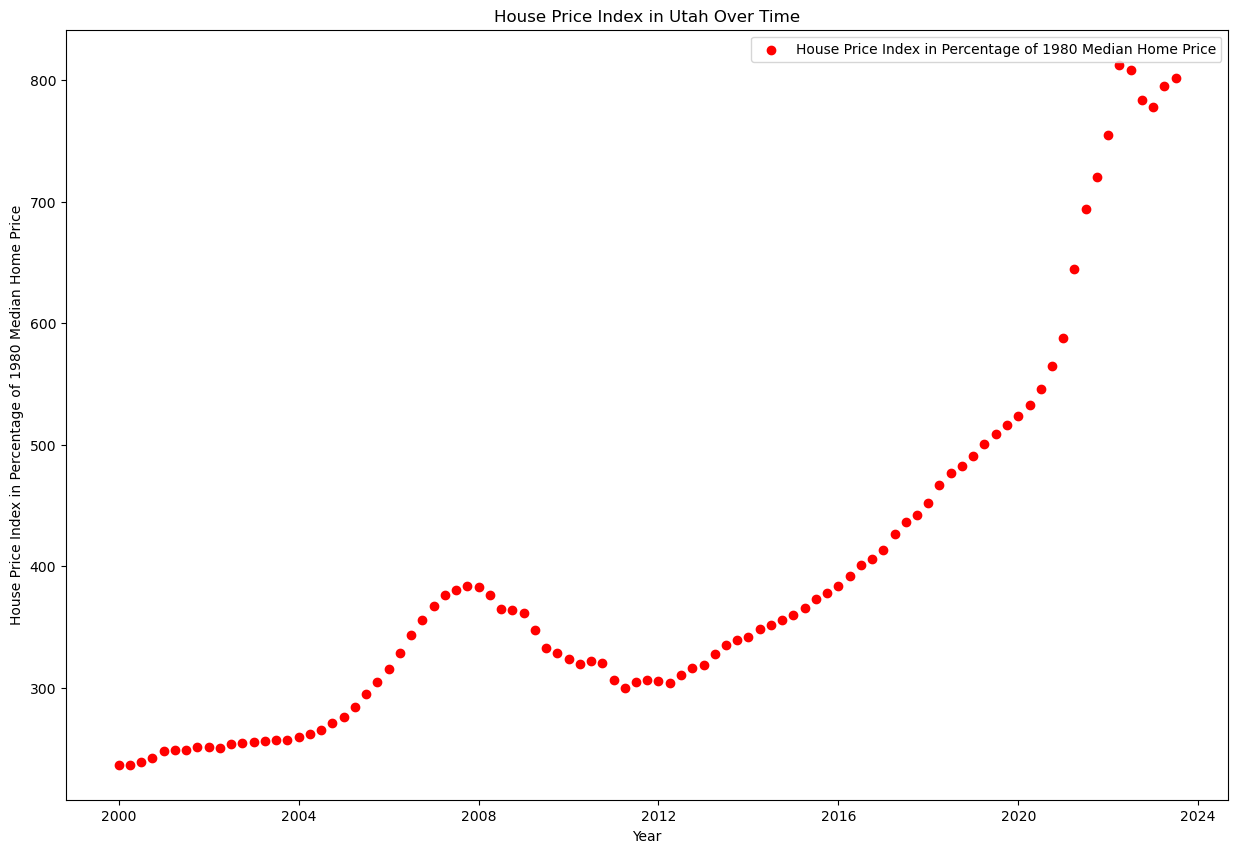

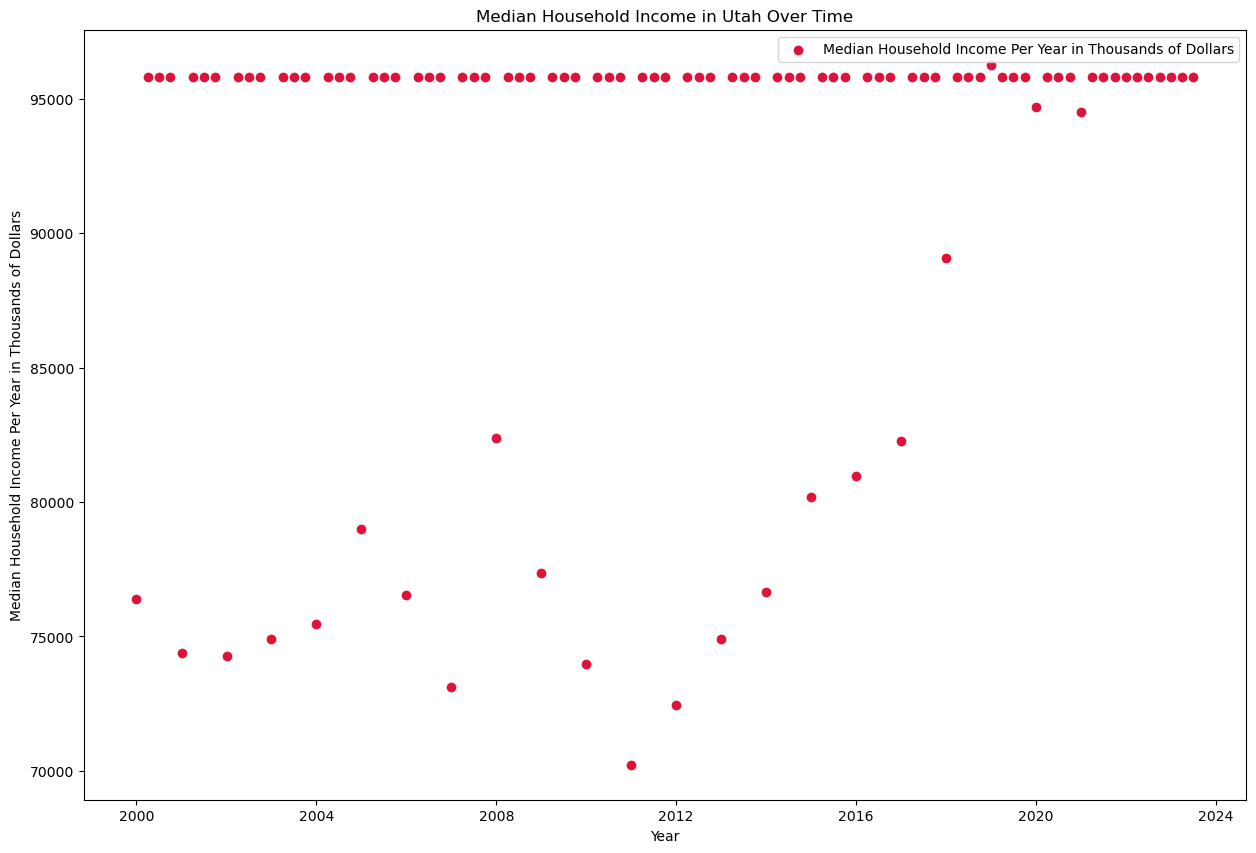

In [4]:
# Visualizing the Data:

# Plot the data as a scatter plot:
plt.figure(figsize=(15, 10))
plt.scatter(filled_df['ds'], filled_df['Population in Thousands'], color='blue', label='Population in Thousands')
plt.title('Population in Utah Over Time')
plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.legend()
plt.show()

# Plot the data as a scatter plot:
plt.figure(figsize=(15, 10))
plt.scatter(filled_df['ds'], filled_df['House Price Index in Percentage of 1980 Median Home Price'], color='red', label='House Price Index in Percentage of 1980 Median Home Price')
plt.title('House Price Index in Utah Over Time')
plt.xlabel('Year')
plt.ylabel('House Price Index in Percentage of 1980 Median Home Price')
plt.legend()
plt.show()

# Plot the data as a scatter plot:
plt.figure(figsize=(15, 10))
plt.scatter(filled_df['ds'], filled_df['Median Household Income Per Year in Thousands of Dollars'], color='crimson', label='Median Household Income Per Year in Thousands of Dollars')
plt.title('Median Household Income in Utah Over Time')
plt.xlabel('Year')
plt.ylabel('Median Household Income Per Year in Thousands of Dollars')
plt.legend()
plt.show()